In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = pd.concat([data.data, data.target.rename("target")], axis=1)

print(f"Dataset shape: {df.shape}")
print("Columns:", df.columns.tolist())
df.head()

Dataset shape: (569, 31)
Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


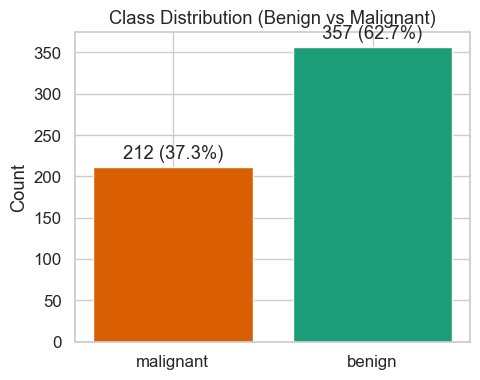

(target
 0    212
 1    357
 Name: count, dtype: int64,
 target
 0    0.372583
 1    0.627417
 Name: count, dtype: float64)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
class_counts = df["target"].value_counts().sort_index()
class_labels = [data.target_names[i] for i in class_counts.index]
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(class_labels, class_counts.values, color=["#d95f02", "#1b9e77"])
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 5, f"{v} ({v/len(df):.1%})", ha="center", va="bottom")
ax.set_ylabel("Count")
ax.set_title("Class Distribution (Benign vs Malignant)")
plt.tight_layout()
plt.show()
class_counts, class_counts / len(df)

Top 4 features by |corr with target|:
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
dtype: float64


/var/folders/pk/4xngd7j10b97ydvy7037lfb40000gn/T/ipykernel_15690/3540662234.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'].map(target_name_map), y=df[feature], ax=ax, palette=["#d95f02", "#1b9e77"], showfliers=False)
/var/folders/pk/4xngd7j10b97ydvy7037lfb40000gn/T/ipykernel_15690/3540662234.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'].map(target_name_map), y=df[feature], ax=ax, palette=["#d95f02", "#1b9e77"], showfliers=False)
/var/folders/pk/4xngd7j10b97ydvy7037lfb40000gn/T/ipykernel_15690/3540662234.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

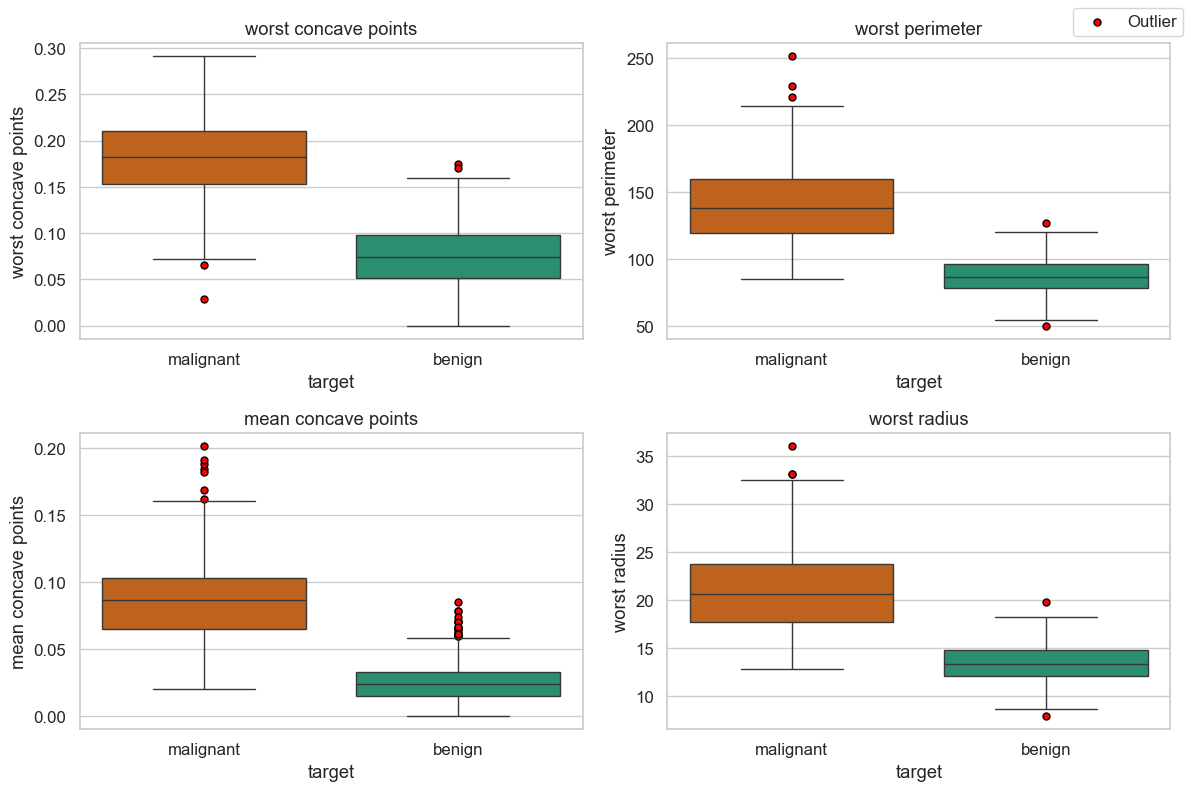

In [3]:
import numpy as np

target_name_map = {0: "malignant", 1: "benign"}

target_corr = df.drop(columns=["target"]).corrwith(df["target"]).abs().sort_values(ascending=False)
top_features = target_corr.head(4).index.tolist()
print("Top 4 features by |corr with target|:")
print(target_corr.head(8))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.flat, top_features):
    sns.boxplot(
        x=df["target"].map(target_name_map),
        y=df[feature],
        ax=ax,
        palette=["#d95f02", "#1b9e77"],
        showfliers=False,
    )
    # highlight outliers beyond 1.5*IQR per class
    for cls in df["target"].unique():
        cls_mask = df["target"] == cls
        values = df.loc[cls_mask, feature]
        q1, q3 = values.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df.loc[cls_mask & ((df[feature] < lower) | (df[feature] > upper))]
        ax.scatter(
            np.full(len(outliers), cls),
            outliers[feature],
            color="red",
            edgecolor="black",
            s=25,
            label="Outlier" if cls == 0 else None,
        )
    ax.set_title(feature)

handles, labels = axes.flat[0].get_legend_handles_labels()
if handles:
    fig.legend(handles[:1], labels[:1], loc="upper right")
plt.tight_layout()
plt.show()

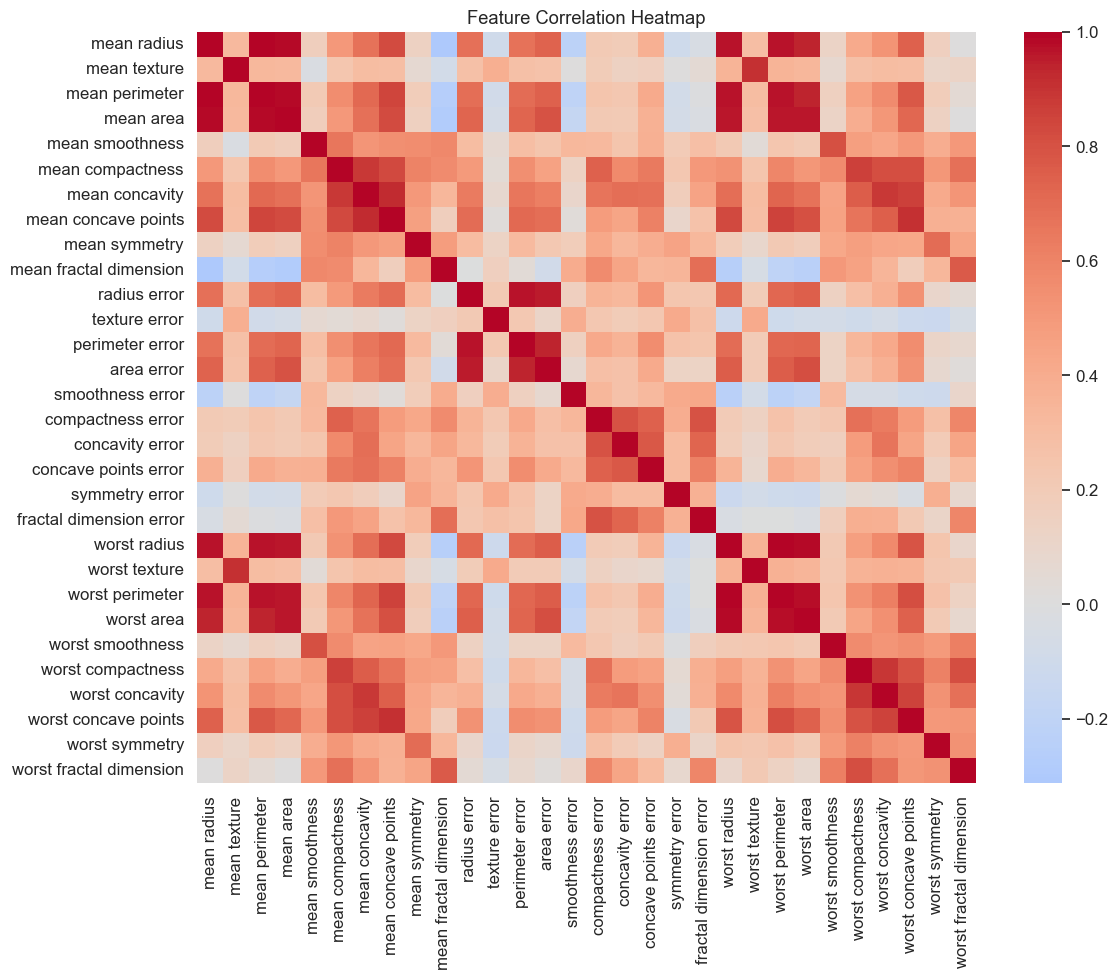

Highly correlated feature pairs (|corr| > 0.9):
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
mean radius      mean area          0.987357
mean perimeter   mean area          0.986507
worst radius     worst area         0.984015
worst perimeter  worst area         0.977578
radius error     perimeter error    0.972794
mean perimeter   worst perimeter    0.970387
mean radius      worst radius       0.969539
mean perimeter   worst radius       0.969476
dtype: float64


In [4]:
corr_matrix = df.drop(columns=["target"]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

high_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().loc[lambda x: x.abs() > 0.9].sort_values(ascending=False)
print("Highly correlated feature pairs (|corr| > 0.9):")
print(high_corr_pairs.head(10))

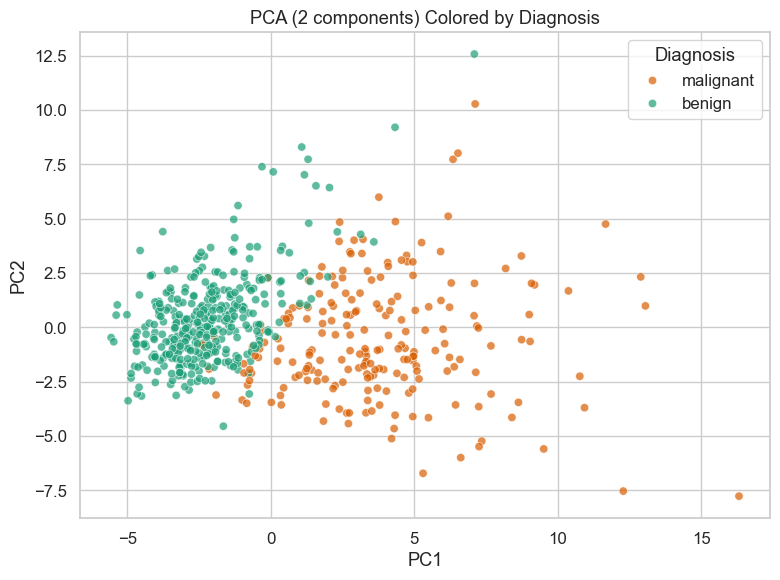

Explained variance ratios: [0.44272026 0.18971182]


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=["target"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["target"] = df["target"].map(target_name_map)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="target", palette=["#d95f02", "#1b9e77"], alpha=0.7
)
plt.title("PCA (2 components) Colored by Diagnosis")
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

print("Explained variance ratios:", pca.explained_variance_ratio_)